In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [15]:
print(tf.__version__)

2.12.0


### Data generation

In [60]:
obs = 1000

xs = np.random.uniform(low=-10, high=10, size=(obs,1))
zs = np.random.uniform(low=-10, high=10, size=(obs,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(obs,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs,targets=generated_targets)

### Solving with TensorFlow

In [61]:
training_data = np.load('TF_intro.npz')

In [62]:
input_size = 2
output_size = 1

model = keras.Sequential([
                        tf.keras.layers.Dense(output_size,
                                             kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                             bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                             )
                        ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 26.9469 - 470ms/epoch - 15ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1009 - 68ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.5081 - 66ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4160 - 70ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4158 - 68ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3881 - 62ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.4452 - 71ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4293 - 67ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.4202 - 68ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.4042 - 83ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: 0.4179 - 71ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.4165 - 82ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 0.4064 - 72ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4153 - 69ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3923 - 81ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 0.4177 - 79ms/epoch - 2ms/ste

### Extract the weights and bias

In [63]:
model.layers[0].get_weights()

[array([[ 2.0192993],
        [-2.9905097]], dtype=float32),
 array([5.000057], dtype=float32)]

In [64]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0192993],
       [-2.9905097]], dtype=float32)

In [65]:
bias = model.layers[0].get_weights()[1]
bias

array([5.000057], dtype=float32)

### Extract the output (make predictions)

In [66]:
pred = model.predict_on_batch(training_data['inputs']).round(1)
pred

array([[ 43.3],
       [ 25.6],
       [  4.6],
       [-33.2],
       [ 27.1],
       [ -8.4],
       [ 36.4],
       [ 12.8],
       [-12. ],
       [ 16.6],
       [ 11.5],
       [  3.2],
       [ -3. ],
       [ 25.6],
       [ -7.4],
       [ 14.4],
       [-38.2],
       [-17.8],
       [ -2.7],
       [ 35.5],
       [ 36.7],
       [ 15.1],
       [-19.6],
       [-17.9],
       [ 15.5],
       [-19.3],
       [ 20.9],
       [ -6.5],
       [-10.5],
       [ 22.8],
       [ 13. ],
       [ -4.9],
       [ 19.4],
       [-25. ],
       [ 26.3],
       [ 16. ],
       [ -9. ],
       [  5. ],
       [-19.4],
       [ 34.6],
       [-30.8],
       [ -8. ],
       [  3.9],
       [ 18.9],
       [ -5.2],
       [-31.2],
       [ 15.2],
       [-35. ],
       [-29.4],
       [  8.9],
       [-31.7],
       [ 20.4],
       [ -0.9],
       [-28.7],
       [ 28.9],
       [-13.9],
       [  6.5],
       [ 25.1],
       [-10.8],
       [ -1.6],
       [ 31.8],
       [  5.9],
       [

In [67]:
train = training_data['targets'].round(1)
train

array([[ 43.9],
       [ 26.2],
       [  5.4],
       [-32.8],
       [ 27.7],
       [ -8.2],
       [ 36.1],
       [ 11.9],
       [-12.4],
       [ 16.2],
       [ 11.9],
       [  4. ],
       [ -3.6],
       [ 26.3],
       [ -6.7],
       [ 14.5],
       [-37.9],
       [-17.1],
       [ -3.5],
       [ 36. ],
       [ 36.6],
       [ 14.4],
       [-19.6],
       [-17.7],
       [ 14.5],
       [-18.4],
       [ 21.7],
       [ -7.5],
       [-10.1],
       [ 22.7],
       [ 12.1],
       [ -4.4],
       [ 19.5],
       [-24.9],
       [ 26.5],
       [ 16. ],
       [ -9.7],
       [  5.1],
       [-20.3],
       [ 34.2],
       [-29.9],
       [ -8. ],
       [  4.9],
       [ 19.2],
       [ -5.9],
       [-30.3],
       [ 15.6],
       [-35.4],
       [-29.7],
       [  8.6],
       [-30.7],
       [ 20.8],
       [ -0.8],
       [-29.4],
       [ 28.2],
       [-14.5],
       [  5.7],
       [ 25.1],
       [-10.6],
       [ -2.8],
       [ 31.4],
       [  6.2],
       [

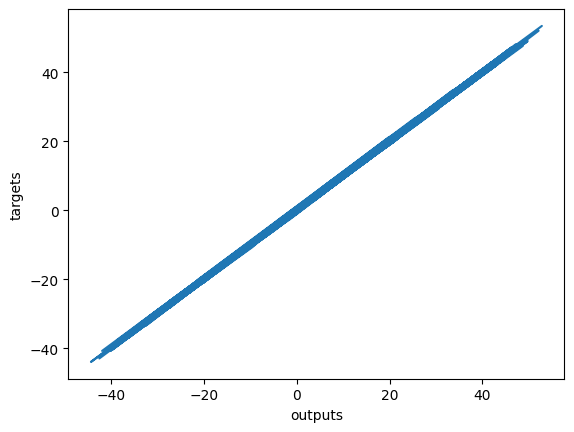

In [68]:
plt.plot(np.squeeze(pred), np.squeeze(train))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
